In [1]:
%matplotlib inline
import os
os.chdir('fast_speech_synthesizer/')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from librosa import display as sound_display

from tacotron.synthesizer import Synthesizer
from hparams import hparams
from tacotron.utils.text import text_to_sequence
from datasets import audio

import IPython.display as ipd
import tensorflow as tf

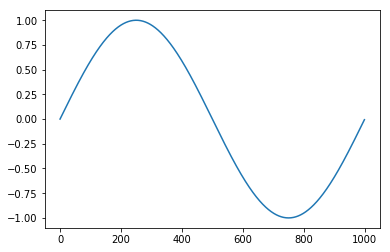

In [4]:
length_of_wave=1000
sample_rate=1000
sine_function = np.sin(np.arange(length_of_wave) * 2 * np.pi /sample_rate).astype(np.float32)
plt.plot(sine_function)

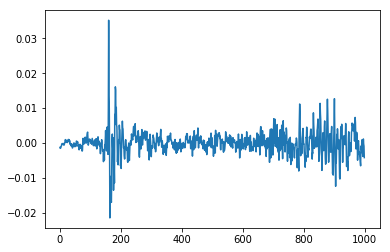

In [5]:
audio_function,_ = librosa.load("input.wav")
plt.plot(audio_function[:sample_rate])

In [6]:
synth = Synthesizer()
checkpoint_path="logs/model.ckpt-189500"
checkpoint_path
synth.load(checkpoint_path)

Constructing model: Tacotron
Initialized Tacotron model. Dimensions (? = dynamic shape): 
  embedding:                (1, ?, 512)
  enc conv out:             (1, ?, 512)
  encoder out:              (1, ?, 512)
  decoder out:              (?, ?, 80)
  residual out:             (?, ?, 512)
  projected residual out:   (?, ?, 80)
  mel out:                  (?, ?, 80)
  <stop_token> out:         (?, ?)
Loading checkpoint: logs/model.ckpt-189500
INFO:tensorflow:Restoring parameters from logs/model.ckpt-189500


In [7]:
sample_rate=22050
cleaner_names = [x.strip() for x in hparams.cleaners.split(',')]
def synthesis_mels(text):
    seq = text_to_sequence(text, cleaner_names)
    feed_dict = {
        synth.model.inputs: [np.asarray(seq, dtype=np.int32)],
        synth.model.input_lengths: np.asarray([len(seq)], dtype=np.int32),
    }
    mels= synth.session.run(synth.mel_outputs, feed_dict=feed_dict)
    mels = mels.reshape(-1, hparams.num_mels)
    return mels

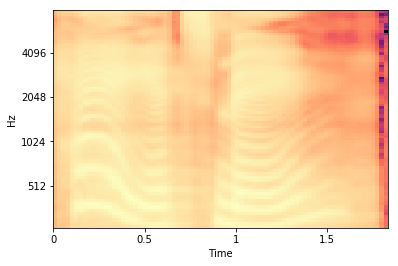

In [8]:
mel_spectogram=synthesis_mels("Hey, Its Me").T
sound_display.specshow(librosa.power_to_db(mel_spectogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')